In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

## CATAFM Data

In [2]:
root_dir = '/l/exp_data/'
exclude_dirs = []
datasets = [
    os.path.join(root_dir, folder) 
    for folder in os.listdir(root_dir)
    if os.path.isdir(os.path.join(root_dir, folder))
]

In [11]:
def crop_data_to_physical_size(data, physical_size=(16, 16), shift_center=(0, 0)):
    # get size of data
    array_size = data["data"].shape[:2]
    lengthX = data["lengthX"]
    lengthY = data["lengthY"]
    
    new_pixel_size = (
        int(array_size[0] / lengthX * physical_size[0]),
        int(array_size[1] / lengthY * physical_size[1])
    )

    # crop data
    center = (array_size[0] // 2, array_size[1] // 2)
    shift_center = (
        center[0] - new_pixel_size[0] // 2,
        center[1] - new_pixel_size[1] // 2
    )
    x = data["data"][
        shift_center[0]:shift_center[0] + new_pixel_size[0],
        shift_center[1]:shift_center[1] + new_pixel_size[1]
    ]

    print(f"array size: {array_size}")
    print(f"physical size: {lengthX}, {lengthY}")
    print("New pixel size: ", new_pixel_size)

    return x

def get_image_with_fixed_resolution(data, resolution=0.125):
    x, lx, ly = data["data"], data["lengthX"], data["lengthY"]

    # calculate new size
    # new size should be a multiple of 32
    new_size = (
        int(np.ceil(lx / resolution / 32) * 32),
        int(np.ceil(ly / resolution / 32) * 32)
    )

    # resize image
    x = transform.resize(x, new_size, mode='wrap', anti_aliasing=True)
    
    return x

def normalize_image(x):
    xmean = np.mean(x, axis=(0, 1), keepdims=True)
    xstd = np.std(x, axis=(0, 1), keepdims=True)
    x = (x - xmean) / xstd
    return x

File: /l/exp_data/BCB/BCB_CO.npz
Physical size: 13.5, 13.5
Data shape: (128, 128, 13)


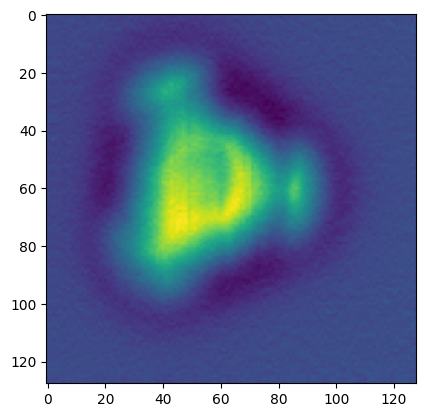

In [12]:
ds = datasets[3]
files = [
    os.path.join(ds, file)
    for file in os.listdir(ds)
    if file.endswith('.npz')
]
f = files[1]

data = np.load(f, allow_pickle=True)

print(f"File: {f}")
x, lx, ly = data['data'], data["lengthX"], data["lengthY"]
x = get_image_with_fixed_resolution(data)
print(f"Physical size: {lx}, {ly}")
print(f"Data shape: {x.shape}")

plt.imshow(x[..., -2])

### Plotting

In [ ]:
for ds in datasets:
    files = [
        os.path.join(ds, f)
        for f in os.listdir(ds)
        if f.endswith('.npz')
    ]
    for f in files:
        print(f)
        data = np.load(f)
        #x = crop_data_to_physical_size(data)
        #x = normalize_image(x)

        heights = data["data"].shape[-1]
        ncols = 4
        nrows = heights // ncols + 1

        fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
        for i in range(heights):
            ax = axes[i // ncols, i % ncols]
            ax.imshow(data["data"][:, :, i], cmap='gray')
            ax.set_title(f"Height {i}")
            ax.axis('off')


        os.makedirs('images', exist_ok=True)
        plt.savefig(f"images/{os.path.basename(f)}.png")
        plt.close()




## Ruben Perez' data